## Packages importieren

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

## Wir haben zwischen 10-70cm jede 3 cm Messungen vorgenommen.
### Messungsabstand in cm  : 

In [68]:
distances = np.arange(10, 73, 3)
print(distances)

[10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70]


## .csv Dateien importieren
### Zudem die Standartabweichung und das arithmetische Mittel direkt errechnen

In [69]:
measurements = []
measurements_mean = []
std = []
upper_std = []
lower_std = []
log = []

# replaces the , with dots 
def replace_dot(x):
    return x.replace(',', '.').encode()

# reads file from folder Messungen with the name x and returns an ndarray
def read_file(x):
    return np.genfromtxt(
        (replace_dot(x) for x in open(f"Messungen/{x}")),
        delimiter=';', skip_header=100, usecols=(1))


# Reads in the csv files and calculates the given values

for file in range(10, 73, 3):
    filename = f"{file}cm.csv"
    temp = np.array(read_file(filename))
    measurements.append(temp)
    measurements_mean.append(np.mean(temp))
    std.append(np.std(temp))
    upper_std.append(np.mean(temp) + np.std(temp))
    lower_std.append(np.mean(temp) - np.std(temp))
    log.append(np.mean(np.log(temp)))


## Kennlinie der Messungen

Text(0.5, 1.0, 'Kennlinie der Messungen')

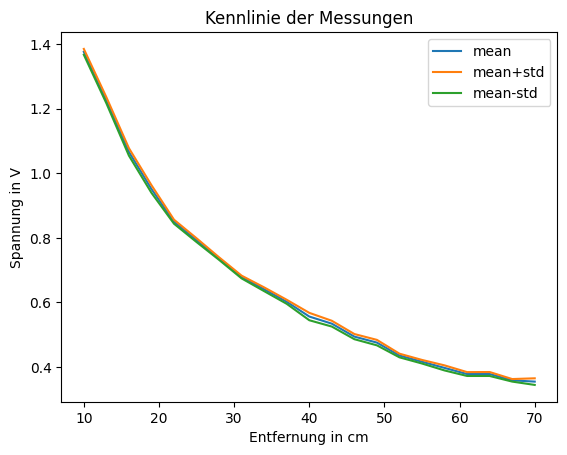

In [70]:
%matplotlib inline

plt.plot(distances, measurements_mean, label="mean")
plt.plot(distances, upper_std, label="mean+std")
plt.plot(distances, lower_std, label="mean-std")
plt.legend()
plt.xlabel('Entfernung in cm')
plt.ylabel('Spannung in V')
plt.title('Kennlinie der Messungen')


## Lineare Regression selbst implementiert

Text(0.5, 1.0, 'Kennlinie der Messungen')

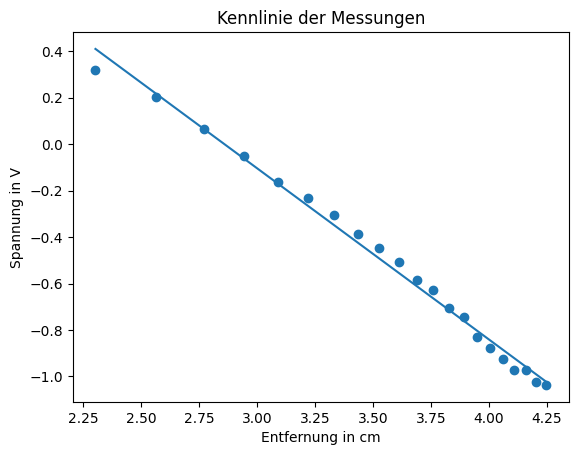

In [71]:
%matplotlib inline
distances_logarithmic = np.log(distances)

mean_of_all_logs = np.mean(log)
mean_of_all_distances = np.mean(distances_logarithmic)

a = 0.0
b = 0.0
temp = 0.0

for i in range(len(log)):
    a += ((distances_logarithmic[i] - mean_of_all_distances)
          * (log[i] - mean_of_all_logs))

for i in range(len(distances_logarithmic)):
    temp += (distances_logarithmic[i] - mean_of_all_distances) ** 2


a = a / temp
b = mean_of_all_logs - a * mean_of_all_distances


def myfunction(x):
    return a * x + b


mymodel = list(map(myfunction, distances_logarithmic))
plt.scatter(distances_logarithmic, log)
plt.plot(distances_logarithmic, mymodel)
plt.xlabel('Entfernung in cm')
plt.ylabel('Spannung in V')
plt.title('Kennlinie der Messungen')


## Kennlinie nach Rückrechnung

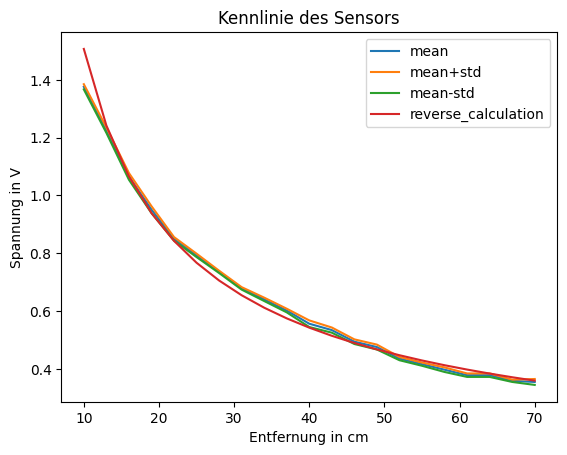

In [72]:
def reverse_calculation(x):
    return np.exp(b) * x ** a
    #return math.e ** b * x ** a

def dx_messung(x):
    return a * np.exp(b) * x**(a-1)


exponential_model = list(map(reverse_calculation, distances))

plt.plot(distances, measurements_mean, label="mean")
plt.plot(distances, upper_std, label="mean+std")
plt.plot(distances, lower_std, label="mean-std")

plt.plot(distances, exponential_model, label="reverse_calculation")
plt.xlabel('Entfernung in cm')
plt.ylabel('Spannung in V')
plt.title('Kennlinie des Sensors')
plt.legend()


## Funktion zur Rückrechnung auf die Entfernung

In [73]:
def get_distance(y):
    return np.power(np.power(math.e, -b) * y, 1/a)

Die Laenge des Blattes beträgt 28.391 cm +/-  0.012 cm
Die Breite des Blattes beträgt 20.069 cm +/-  0.017 cm


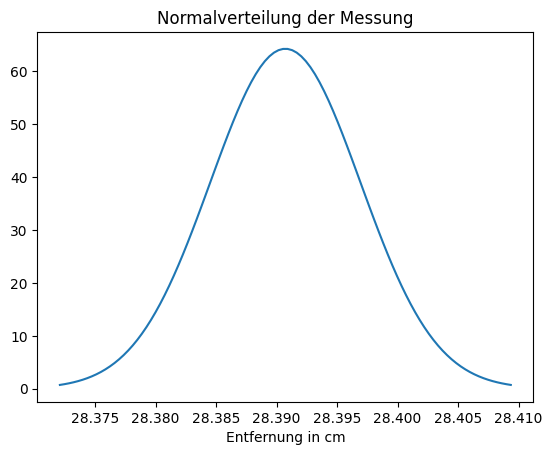

In [74]:
def read_file_sheet(x):
    return np.genfromtxt(
        (replace_dot(x) for x in open(f"Blatt/{x}")),
        delimiter=';', skip_header=100, usecols=(1))


def gaussian(mu, sigma):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.xlabel('Entfernung in cm')
    plt.title('Normalverteilung der Messung')

paper_length_data = read_file_sheet("blattL.csv")
paper_width_data = read_file_sheet("blattB.csv")
# Mean and std of paper length
paper_length_mean = np.mean(paper_length_data)
paper_length_std = np.std(paper_length_data)

# Mean and std of paper width
paper_width_mean = np.mean(paper_width_data)
paper_width_std = np.std(paper_width_data)

paper_length_approximate = get_distance(paper_length_mean)
paper_width_approximate = get_distance(paper_width_mean)

# Konfidenzintervall 95 % (1.98 Sigma)
print(
    f"Die Laenge des Blattes beträgt {np.round(paper_length_approximate,3)} cm +/-  {np.round(1.98 * paper_length_std, 3)} cm")
print(
    f"Die Breite des Blattes beträgt {np.round(paper_width_approximate,3)} cm +/-  {np.round(1.98 * paper_width_std, 3)} cm")

gaussian(paper_length_approximate, paper_length_std)
#gaussian(paper_width_approximate, paper_width_std)

Messfehler

breite = 8.86836002864999 mm
delta_x = -201.13163997135 mm
delta_y = 1456.9313902606157 mm


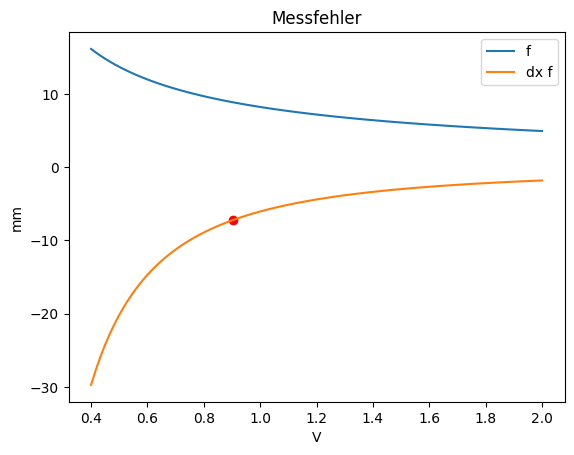

In [75]:
x = paper_width_mean
#x = paper_length_mean
measured_breite = reverse_calculation(x)
print("breite =", measured_breite, "mm")

delta_x = measured_breite - 210
print("delta_x =", delta_x, "mm")

delta_y = dx_messung(x) * delta_x
print("delta_y =", delta_y, "mm")

plt.figure()
plt.title("Messfehler")
plt.ylabel("mm")
plt.xlabel("V")
xc = np.linspace(0.4, 2, 100)
plt.plot(xc, reverse_calculation(xc), label="f")
plt.plot(xc, dx_messung(xc), label="dx f")
plt.scatter(x, dx_messung(x), color='r')
plt.legend()
plt.show()

Flächenberechnung

In [79]:
x1 = paper_width_mean
x2 = paper_length_mean

# Funktion zur Berechnung der Fläche
def flaeche(x1, x2):
    return reverse_calculation(x1) * reverse_calculation(x2)

# Partielle Ableitung nach x1
def partial_derivative_x1(x1, x2):
    return dx_messung(x1) * reverse_calculation(x2)

# Partielle Ableitung nach x2
def partial_derivative_x2(x1, x2):
    return reverse_calculation(x1) * dx_messung(x2)

# Unsicherheit der Fläche mit gaußscher Fehlerfortpflanzung
def unsicherheit(x1, x2):
    dx1 = delta_x 
    dx2 = delta_x 

    derivative_x1 = partial_derivative_x1(x1, x2)
    derivative_x2 = partial_derivative_x2(x1, x2)

    area_uncertainty = np.sqrt((derivative_x1 * dx1)**2 + (derivative_x2 * dx2)**2)
    return area_uncertainty


print("Fläche:", flaeche(x1, x2))
print("Unsicherheit der Fläche:", unsicherheit(x1, x2))


Fläche: 94.94157205267804
Unsicherheit der Fläche: 25472.76375278239
